## Plotnine contest 2025

### Dataset

Billboard Hot 100 Number Ones [database](https://docs.google.com/spreadsheets/d/1j1AUgtMnjpFTz54UdXgCKZ1i4bNxFjf01ImJ-BqBEt0/edit?gid=1974823090#gid=1974823090) from TidyTuesday for [August 26, 2025](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-08-26).


In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import textwrap

In [2]:
billboard = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-08-26/billboard.csv')

In [3]:
billboard

,song,artist,date,weeks_at_number_one,non_consecutive,rating_1,rating_2,rating_3,overall_rating,divisiveness,...,featured_in_a_then_contemporary_play,written_for_a_film,featured_in_a_then_contemporary_film,written_for_a_t_v_show,featured_in_a_then_contemporary_t_v_show,associated_with_dance,topped_the_charts_by_multiple_artist,double_a_side,eurovision_entry,u_s_artwork
0,Poor Little Fool,Ricky Nelson,1958-08-04T00:00:00Z,2,0,4,5,3,4.000000,1.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Cannot Locate
1,Nel Blu Dipinto Di Blu,Domenico Modugno,1958-08-18T00:00:00Z,5,1,7,7,5,6.333333,1.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,1,Cannot Locate
2,Little Star,The Elegants,1958-08-25T00:00:00Z,1,0,5,6,6,5.666667,0.666667,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Cannot Locate
3,It's All in the Game,Tommy Edwards,1958-09-29T00:00:00Z,6,0,3,3,7,4.333333,2.666667,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Cannot Locate
4,It's Only Make Believe,Conway Twitty,1958-11-10T00:00:00Z,2,1,7,8,9,8.000000,1.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Cannot Locate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,Please Please Please,Sabrina Carpenter,2024-06-29T00:00:00Z,1,0,8,7,8,7.666667,0.666667,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Artist Photograph
1173,A Bar Song (Tipsy),Shaboozey,2024-07-13T00:00:00Z,19,1,6,4,9,6.333333,3.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Artist Photograph;Photograph Related to Song T...
1174,Love Somebody,Morgan Wallen,2024-11-02T00:00:00Z,1,0,3,5,5,4.333333,1.333333,...,NaN,0,NaN,0,NaN,0,0,NaN,0,Photograph Not Related to Song
1175,squabble up,Kendrick Lamar,2024-12-07T00:00:00Z,1,0,9,10,9,9.333333,0.666667,...,NaN,0,NaN,0,NaN,0,0,NaN,0,NaN


Change the data type for date column and create a new column having categories based on year.

In [4]:
billboard['date'] = pd.to_datetime(billboard['date'])
# add a new  col date2 having three categories Before 2000, 2000-2025
billboard['date2'] = pd.cut(billboard['date'].dt.year, bins=[0, 2000, 2025], labels=['Before 2000', 'After 2000'])
billboard['date2'].value_counts()

date2
Before 2000    867
After 2000     310
Name: count, dtype: int64

Lists for major and relative minor keys

In [5]:
major_keys = ['C', 'G', 'D', 'A', 'E', 'B', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F']
minor_keys = ['A', 'E', 'B', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C', 'G', 'D']

Calculate number of songs per key

In [6]:
key_counts = {}
for key in major_keys:
    count = billboard[billboard['simplified_key'] == key].shape[0]
    key_counts[(key, 'major')] = count
for key in minor_keys:
    count = billboard[billboard['simplified_key'] == key + 'm'].shape[0]
    key_counts[(key, 'minor')] = count

In [7]:
key_counts

{('C', 'major'): 120,
 ('G', 'major'): 83,
 ('D', 'major'): 70,
 ('A', 'major'): 67,
 ('E', 'major'): 69,
 ('B', 'major'): 29,
 ('Gb', 'major'): 29,
 ('Db', 'major'): 57,
 ('Ab', 'major'): 49,
 ('Eb', 'major'): 42,
 ('Bb', 'major'): 48,
 ('F', 'major'): 76,
 ('A', 'minor'): 40,
 ('E', 'minor'): 27,
 ('B', 'minor'): 25,
 ('Gb', 'minor'): 21,
 ('Db', 'minor'): 29,
 ('Ab', 'minor'): 20,
 ('Eb', 'minor'): 26,
 ('Bb', 'minor'): 28,
 ('F', 'minor'): 34,
 ('C', 'minor'): 32,
 ('G', 'minor'): 31,
 ('D', 'minor'): 29}

Function to format key labels.

In [8]:
def format_key(key):
    mapping = {'Bb': 'B♭', 'Ab': 'A♭', 'Db': 'D♭', 'Gb': 'G♭', 'Eb': 'E♭'}
    return mapping.get(key, key)

major_keys_formatted = [format_key(k) for k in major_keys]
minor_keys_formatted = [format_key(k) + 'ₘ' for k in minor_keys]

In [9]:
print(major_keys_formatted)
print(minor_keys_formatted)

['C', 'G', 'D', 'A', 'E', 'B', 'G♭', 'D♭', 'A♭', 'E♭', 'B♭', 'F']
['Aₘ', 'Eₘ', 'Bₘ', 'G♭ₘ', 'D♭ₘ', 'A♭ₘ', 'E♭ₘ', 'B♭ₘ', 'Fₘ', 'Cₘ', 'Gₘ', 'Dₘ']


Arange points on a circle

In [10]:
n = len(major_keys)

# create 12 points on a circle
angles = np.linspace(0, -2*np.pi, n, endpoint=False)
rotated_angles = angles + np.pi / 2

# Radii for major and minor circles
major_radius = 1.0
minor_radius = 0.7  

At each point in the major and minor circles there'll be a spiral showing the number of songs. The function below is used to generate spirals. 

In [24]:
def generate_spiral(center_x, center_y, turns=2, points=20, scale=0.02):  
    t = np.linspace(0, 2*np.pi*turns, points)
    r = scale * t
    x = center_x + r * np.cos(t)
    y = center_y + r * np.sin(t)
    return pd.DataFrame({'x': x, 'y': y})

In [25]:
test_df = generate_spiral(0,0)
test_df

,x,y
0,0.000000,0.000000e+00
1,0.010439,8.124657e-03
2,0.006494,2.564599e-02
3,-0.015941,3.634089e-02
4,-0.046534,2.518287e-02
5,-0.065237,-1.088609e-02
6,-0.053754,-5.839187e-02
7,-0.007646,-9.227805e-02
8,0.057879,-8.859069e-02
9,0.112599,-3.865542e-02


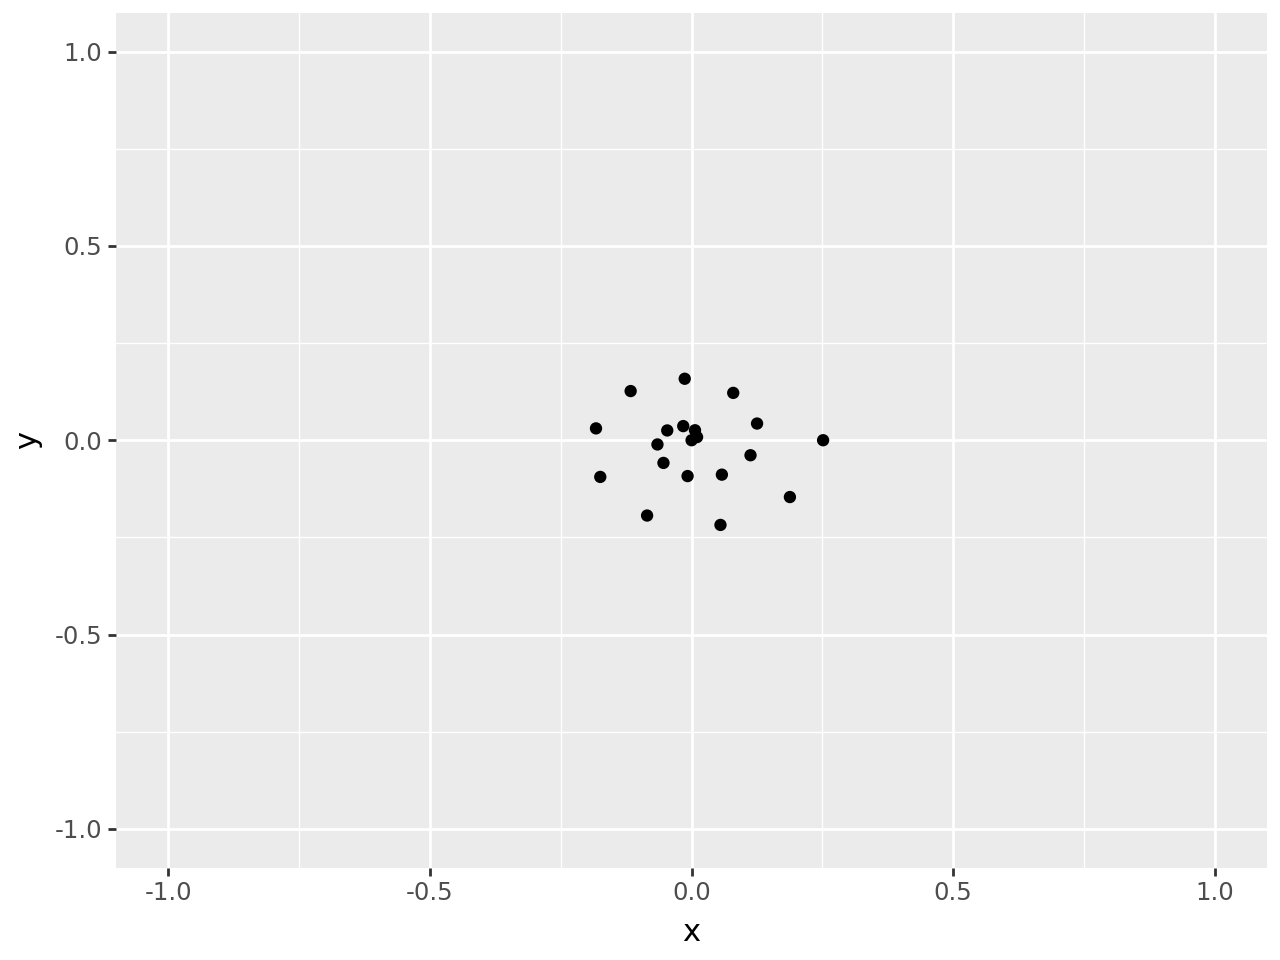

In [29]:
test_spiral  = (
    ggplot() +
    geom_point(data=test_df, mapping=aes('x', 'y')) + 
    xlim(-1,1) + ylim(-1,1)
)
test_spiral

Generate spiral for each key based on the number of songs for that key in the database. The number of turns in a spiral is calculated by floor division of total number of songs by 20. The maximum number of turns in a spiral are restricted to 5 using the `min` function.

In [77]:
spirals = []
for i in range(n):
    # Major keys
    key = major_keys[i]
    mode = 'major'
    subset = billboard[billboard['simplified_key'] == key]
    count = len(subset)
    turns = min(5, count // 20)
    scale = 0.01 * (30 / count) * (turns / 2) 
    center_x = major_radius * np.cos(rotated_angles[i])
    center_y = major_radius * np.sin(rotated_angles[i])
    df = generate_spiral(center_x, center_y, turns=turns, points=count, scale=scale).assign(date2=subset['date2'].values)
    spirals.append(df)
    
    # Minor keys
    key = minor_keys[i]
    mode = 'minor'
    subset = billboard[billboard['simplified_key'] == key + 'm']
    count = len(subset)
    turns = min(5, count // 20)
    scale = 0.01 * (30 / count) * (turns / 2)
    center_x = minor_radius * np.cos(rotated_angles[i])
    center_y = minor_radius * np.sin(rotated_angles[i])
    df = generate_spiral(center_x, center_y, turns=turns, points=count, scale=scale).assign(date2=subset['date2'].values)
    spirals.append(df)

spiral_df = pd.concat(spirals, ignore_index=True)

In [78]:
spiral_df

,x,y,date2
0,6.123234e-17,1.000000,Before 2000
1,1.592831e-03,1.000431,Before 2000
2,2.850590e-03,1.001663,Before 2000
3,3.476993e-03,1.003523,Before 2000
4,3.249567e-03,1.005745,Before 2000
...,...,...,...
1076,-3.326318e-01,0.584439,After 2000
1077,-3.273135e-01,0.588126,After 2000
1078,-3.228107e-01,0.593124,After 2000
1079,-3.194472e-01,0.599244,After 2000


In [92]:
print(billboard.shape)
print(billboard[billboard['simplified_key'] == "Multiple Keys"].shape)

(1177, 106)
(96, 106)


Songs with multiple keys have been excluded. 

In [91]:
spiral_df.shape[0] + billboard[billboard['simplified_key'] == "Multiple Keys"].shape[0]

1177

Set key labels outside the circle
for major keys and inside the circle for minor keys.

In [79]:
major_label_radius = major_radius + 0.2
va_list = ['top' if -np.pi/2 < rotated_angles[i] < np.pi/2 else 'bottom' for i in range(n)] * 2
x_list = np.concatenate([np.array([major_label_radius * np.cos(rotated_angles[i])]) for i in range(n)] +
                        [np.array([minor_radius * 0.8 * np.cos(rotated_angles[i])]) for i in range(n)])
y_list = np.concatenate([np.array([major_label_radius * np.sin(rotated_angles[i])]) for i in range(n)] +
                        [np.array([minor_radius * 0.8 * np.sin(rotated_angles[i])]) for i in range(n)])
labels_df = pd.DataFrame({
    'key_only': major_keys_formatted + minor_keys_formatted,
    'type': ['Major']*n + ['Minor']*n,
    'x': x_list,
    'y': y_list,
    'va': va_list
})

In [80]:
labels_df

,key_only,type,x,y,va
0,C,Major,7.347881e-17,1.200000e+00,bottom
1,G,Major,6.000000e-01,1.039230e+00,top
2,D,Major,1.039230e+00,6.000000e-01,top
3,A,Major,1.200000e+00,0.000000e+00,top
4,E,Major,1.039230e+00,-6.000000e-01,top
5,B,Major,6.000000e-01,-1.039230e+00,top
6,G♭,Major,7.347881e-17,-1.200000e+00,bottom
7,D♭,Major,-6.000000e-01,-1.039230e+00,bottom
8,A♭,Major,-1.039230e+00,-6.000000e-01,bottom
9,E♭,Major,-1.200000e+00,-1.469576e-16,bottom


Color palette

In [81]:
bg_color = '#361D1D'
fg_color = '#CEB1E8'
color_before2000 = '#FEDA99'
color_after2000 =  '#FC8355'

In [82]:
wrapped_title = textwrap.fill('Circle of fifths showing the number of Billboard hits for each key.', width=25)

## Ploting

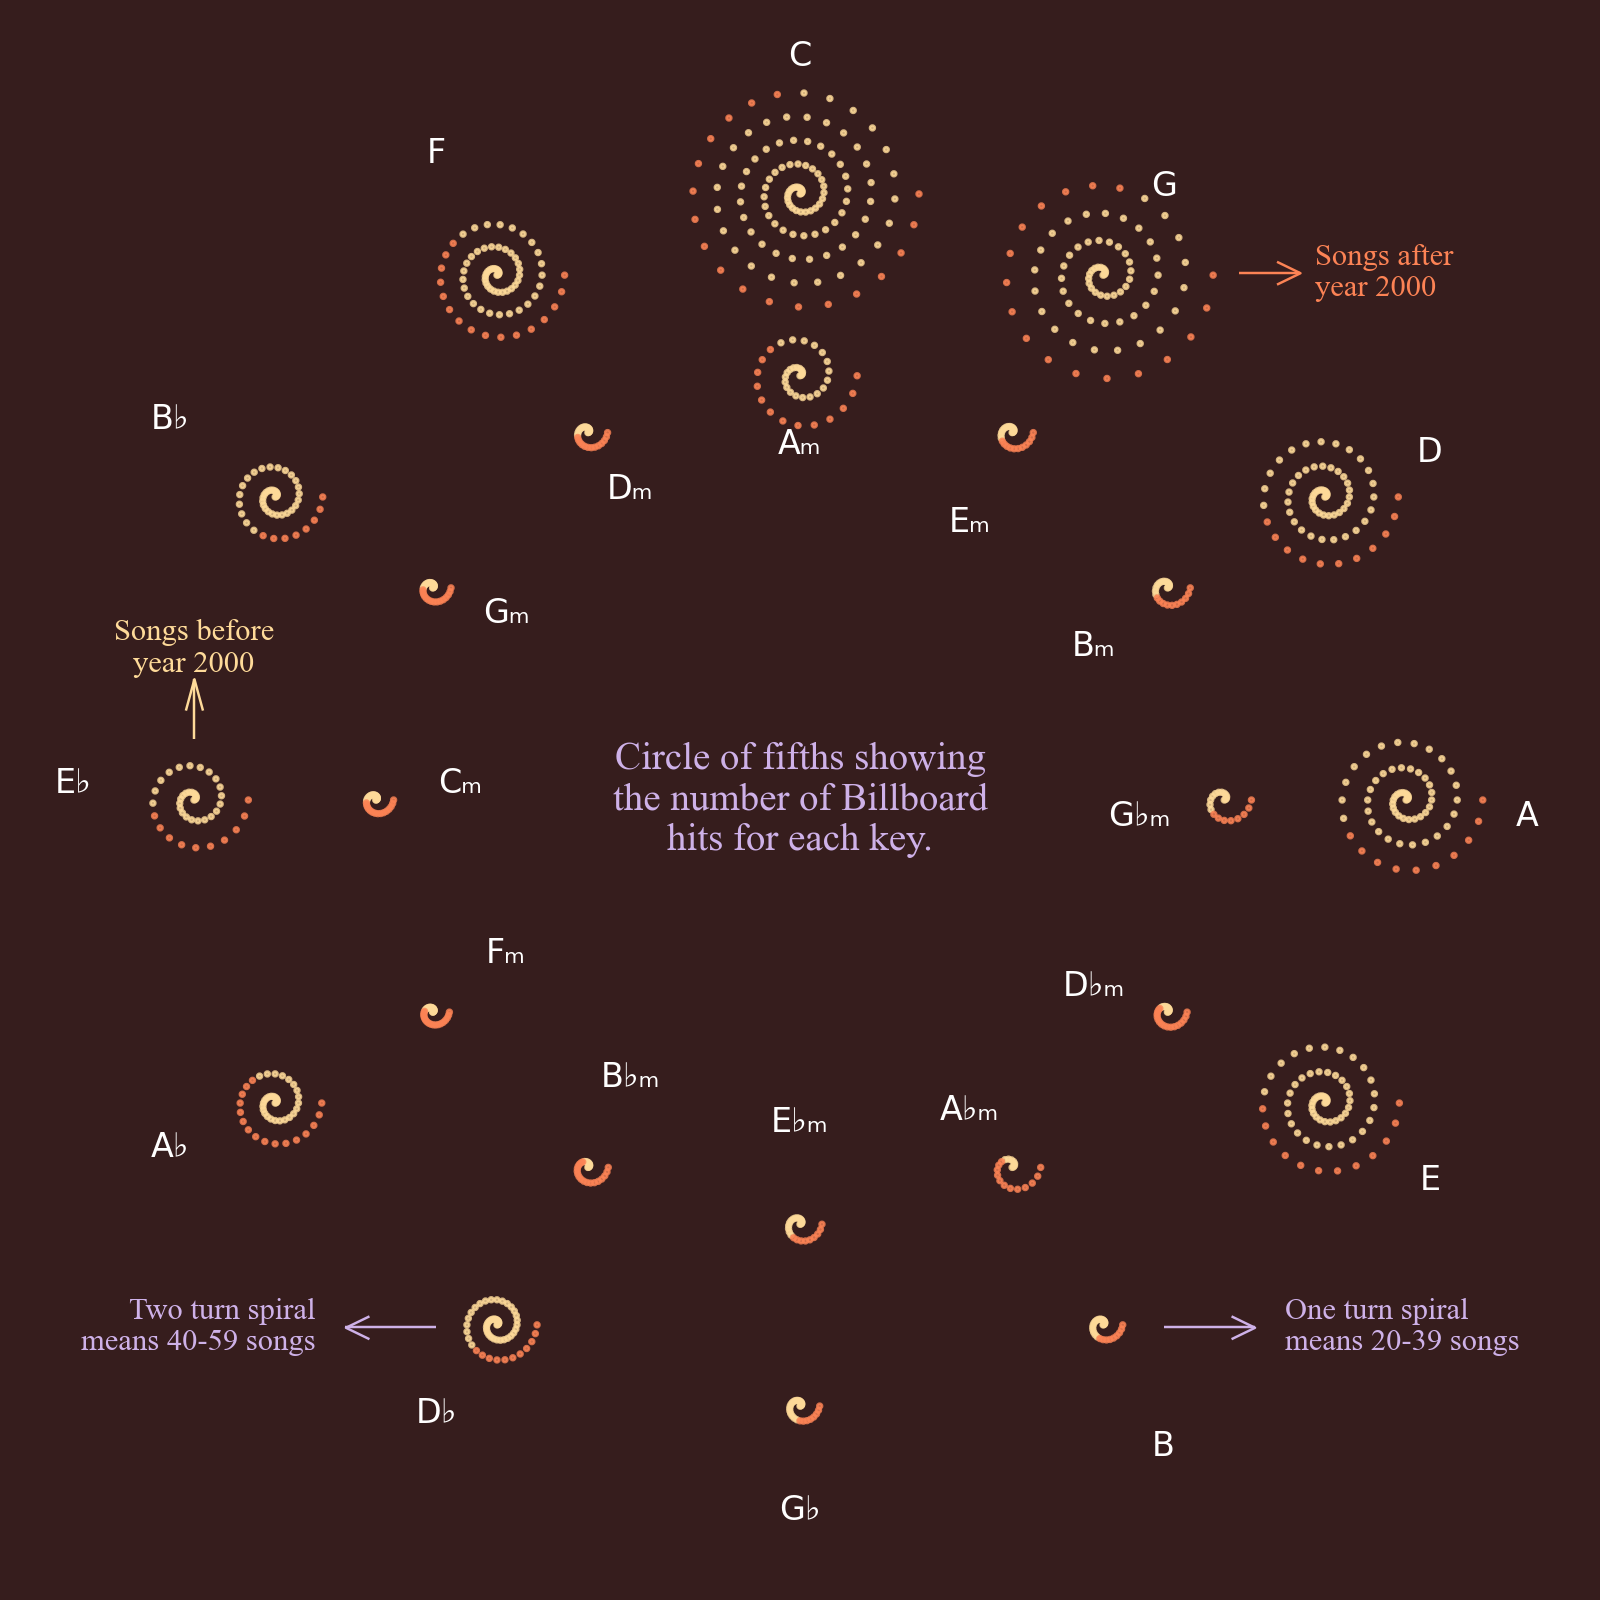

In [94]:
circle_plot = (
    ggplot() +
    geom_point(data=spiral_df, mapping=aes('x', 'y', color='date2'), size=0.5, alpha=0.8) +
    geom_text(data=labels_df, mapping=aes('x', 'y', label='key_only', va='va'), size=12, ha='center', color='#FFFFFF') +

    # Add annotations
    geom_segment(mapping=aes(x='x', y='y', xend='xend', yend='yend'), data=pd.DataFrame({'x': [-1], 'y': [0.1], 'xend': [-1], 'yend': [0.2]}), arrow=arrow(length=0.1, angle=20), color=color_before2000) +    
    geom_text(mapping=aes('x', 'y', label='text1', va='va'), data=pd.DataFrame({'x': [-1], 'y': [0.25], 'text1': ['Songs before\nyear 2000'], 'va': ['center']}), size=11, ha='center', color=color_before2000, family='serif') +
    geom_segment(mapping=aes(x='x', y='y', xend='xend', yend='yend'), data=pd.DataFrame({'x': [0.725], 'y': [0.87], 'xend': [0.825], 'yend': [0.87]}), arrow=arrow(length=0.1, angle=20), color=color_after2000) +
    geom_text(mapping=aes('x', 'y', label='text1', va='va'), data=pd.DataFrame({'x': [0.85], 'y': [0.87], 'text1': ['Songs after\nyear 2000'], 'va': ['center']}), size=11, ha='left', color=color_after2000, family='serif') +
    geom_segment(mapping=aes(x='x', y='y', xend='xend', yend='yend'), data=pd.DataFrame({'x': [0.6], 'y': [-0.87], 'xend': [0.75], 'yend': [-0.87]}), arrow=arrow(length=0.1, angle=20), color=fg_color) +
    geom_text(mapping=aes('x', 'y', label='text1', va='va'), data=pd.DataFrame({'x': [0.8], 'y': [-0.87], 'text1': ['One turn spiral\nmeans 20-39 songs'], 'va': ['center']}), size=11, ha='left', color=fg_color, family='serif') +
    geom_segment(mapping=aes(x='x', y='y', xend='xend', yend='yend'), data=pd.DataFrame({'x': [-0.6], 'y': [-0.87], 'xend': [-0.75], 'yend': [-0.87]}), arrow=arrow(length=0.1, angle=20), color=fg_color) +
    geom_text(mapping=aes('x', 'y', label='text1', va='va'), data=pd.DataFrame({'x': [-0.8], 'y': [-0.87], 'text1': ['Two turn spiral\nmeans 40-59 songs'], 'va': ['center']}), size=11, ha='right', color=fg_color, family='serif') +

    # Customization
    coord_fixed() +
    theme_void() +
    scale_color_manual(values={'Before 2000': color_before2000, 'After 2000': color_after2000}) +
    annotate('text', x=0, y=0, label=wrapped_title, size=14, ha='center', color=fg_color, family='serif') +
    guides(color=False) + 
    theme(figure_size=(8, 8),
        plot_background=element_rect(fill=bg_color),
        panel_background=element_rect(fill=bg_color)
)
)
circle_plot
#circle_plot.save('billboard_plot.png', dpi=300, width=8, height=8)